<a href="https://colab.research.google.com/github/anindabitm/Malawi_flood_prediction/blob/master/flood_prediction_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/anindabitm/Malawi_flood_prediction/master/Train_1.csv'
data=pd.read_csv(url,index_col='Square_ID')

In [0]:
print(data.shape)
data.head(5)

(16466, 39)


,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
Square_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4e3c3896-14ce-11ea-bce5-f49634744a41,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9
4e3c3897-14ce-11ea-bce5-f49634744a41,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9
4e3c3898-14ce-11ea-bce5-f49634744a41,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9
4e3c3899-14ce-11ea-bce5-f49634744a41,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10
4e3c389a-14ce-11ea-bce5-f49634744a41,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,57.451361,30.127047,30.449468,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,3.304466,0.0,12.99262,4.582856,35.037532,4.796012,28.083314,0.0,58.362456,18.264692,17.537486,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10


In [0]:
cols=data.columns
print("The columns in the data are:\n")
print(cols)

The columns in the data are:

Index(['X', 'Y', 'target_2015', 'elevation', 'precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15',
       'precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019

In [0]:
data.describe()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,precip 2014-12-28 - 2015-01-04,precip 2015-01-04 - 2015-01-11,precip 2015-01-11 - 2015-01-18,precip 2015-01-18 - 2015-01-25,precip 2015-01-25 - 2015-02-01,precip 2015-02-01 - 2015-02-08,precip 2015-02-08 - 2015-02-15,precip 2015-02-15 - 2015-02-22,precip 2015-02-22 - 2015-03-01,precip 2015-03-01 - 2015-03-08,precip 2015-03-08 - 2015-03-15,precip 2019-01-20 - 2019-01-27,precip 2019-01-27 - 2019-02-03,precip 2019-02-03 - 2019-02-10,precip 2019-02-10 - 2019-02-17,precip 2019-02-17 - 2019-02-24,precip 2019-02-24 - 2019-03-03,precip 2019-03-03 - 2019-03-10,precip 2019-03-10 - 2019-03-17,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
count,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.00000
mean,35.077656,-15.813802,0.076609,592.848206,1.610760,2.502058,1.162076,8.270610,8.892459,9.572821,22.925036,28.113210,58.859208,1.251173,34.653177,28.314888,12.487909,3.802584,17.072285,9.110949,0.330641,13.329023,4.437490,23.149500,9.749785,29.575991,1.864399,60.424964,12.321620,35.637354,2.126234,3.453395,3.559366,9.127677,1.660709,0.526144,0.968101,1.585743,10.73175
std,0.392395,0.359789,0.228734,354.790357,4.225461,8.631846,4.396676,4.263375,3.760052,4.523767,13.690451,7.794291,16.807838,1.969923,7.456422,8.047223,7.064435,2.674434,6.074926,4.572201,1.008490,5.552818,5.163184,6.148509,4.558172,8.508608,4.158313,8.313199,9.900994,14.519169,3.734829,8.007248,3.820294,6.868937,4.418032,1.494935,3.690698,4.651863,2.02610
min,34.260000,-16.640000,0.000000,45.541444,0.000000,0.000000,0.000000,1.411452,3.580342,1.254098,7.462999,15.648154,30.449468,0.000000,14.964383,13.261280,0.459067,0.279002,6.728685,3.283425,0.000000,3.813864,0.000000,12.450319,2.801546,12.780855,0.000000,32.108226,0.000000,15.803429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
25%,34.760000,-16.070000,0.000000,329.063852,0.000000,0.000000,0.000000,5.548440,5.905440,6.179885,11.617057,23.483879,45.972601,0.000000,30.037450,22.262417,5.090802,1.654155,13.769957,5.538848,0.000000,8.946479,0.888216,19.590606,6.761704,25.360910,0.000000,56.380490,3.120173,22.021763,0.000000,0.000000,0.000000,4.352528,0.000000,0.000000,0.000000,0.000000,9.00000
50%,35.050000,-15.800000,0.000000,623.000000,0.000000,0.000000,0.000000,7.941822,8.618390,8.786780,18.381539,26.085586,55.501115,0.502164,34.363729,26.512675,14.092012,3.301029,15.549508,8.235819,0.000000,12.913147,2.249833,21.661698,9.076457,30.593415,0.690000,60.581696,12.508606,34.275716,0.896323,0.000000,2.607053,7.862453,0.000000,0.000000,0.000000,0.000000,10.00000
75%,35.390000,-15.520000,0.000000,751.434813,1.261848,0.000000,0.000000,10.887235,10.960668,12.670775,31.304699,33.587434,69.311540,1.195866,36.715386,34.880240,18.681926,5.120276,19.836449,11.308650,0.000000,17.123831,6.832768,24.213460,10.830000,33.300457,1.429370,65.721446,20.004375,44.253897,2.076590,2.914996,6.390000,13.459070,0.000000,0.000000,0.000000,0.000000,12.00000
max,35.860000,-15.210000,1.000000,2803.303645,19.354969,41.023858,22.020803,18.870675,23.044340,21.757828,62.433432,51.197420,105.275891,11.103658,53.014243,44.341312,28.559

In [0]:
data.isnull().sum()

X                                 0
Y                                 0
target_2015                       0
elevation                         0
precip 2014-11-16 - 2014-11-23    0
precip 2014-11-23 - 2014-11-30    0
precip 2014-11-30 - 2014-12-07    0
precip 2014-12-07 - 2014-12-14    0
precip 2014-12-14 - 2014-12-21    0
precip 2014-12-21 - 2014-12-28    0
precip 2014-12-28 - 2015-01-04    0
precip 2015-01-04 - 2015-01-11    0
precip 2015-01-11 - 2015-01-18    0
precip 2015-01-18 - 2015-01-25    0
precip 2015-01-25 - 2015-02-01    0
precip 2015-02-01 - 2015-02-08    0
precip 2015-02-08 - 2015-02-15    0
precip 2015-02-15 - 2015-02-22    0
precip 2015-02-22 - 2015-03-01    0
precip 2015-03-01 - 2015-03-08    0
precip 2015-03-08 - 2015-03-15    0
precip 2019-01-20 - 2019-01-27    0
precip 2019-01-27 - 2019-02-03    0
precip 2019-02-03 - 2019-02-10    0
precip 2019-02-10 - 2019-02-17    0
precip 2019-02-17 - 2019-02-24    0
precip 2019-02-24 - 2019-03-03    0
precip 2019-03-03 - 2019-03-

In [0]:
predict_cols=['X','Y','elevation','precip 2014-11-16 - 2014-11-23',
       'precip 2014-11-23 - 2014-11-30', 'precip 2014-11-30 - 2014-12-07',
       'precip 2014-12-07 - 2014-12-14', 'precip 2014-12-14 - 2014-12-21',
       'precip 2014-12-21 - 2014-12-28', 'precip 2014-12-28 - 2015-01-04',
       'precip 2015-01-04 - 2015-01-11', 'precip 2015-01-11 - 2015-01-18',
       'precip 2015-01-18 - 2015-01-25', 'precip 2015-01-25 - 2015-02-01',
       'precip 2015-02-01 - 2015-02-08', 'precip 2015-02-08 - 2015-02-15',
       'precip 2015-02-15 - 2015-02-22', 'precip 2015-02-22 - 2015-03-01',
       'precip 2015-03-01 - 2015-03-08', 'precip 2015-03-08 - 2015-03-15','LC_Type1_mode']
label_cols='target_2015'
df=data.loc[:,predict_cols + [label_cols]]
df.columns=['X','Y','elevation','1W','2W','3W','4W','5W','6W','7W','8W','9W','10W','11W','12W','13W','14W','15W','16W','17W','LC_Type1_mode','target']
predict_cols=['X','Y','elevation','1W','2W','3W','4W','5W','6W','7W','8W','9W','10W','11W','12W','13W','14W','15W','16W','17W','LC_Type1_mode']
label_cols='target'
print("Shape of df is:",df.shape)
print(df.columns)

Shape of df is: (16466, 22)
Index(['X', 'Y', 'elevation', '1W', '2W', '3W', '4W', '5W', '6W', '7W', '8W',
       '9W', '10W', '11W', '12W', '13W', '14W', '15W', '16W', '17W',
       'LC_Type1_mode', 'target'],
      dtype='object')


In [0]:
predict_test_cols=['X','Y','elevation','precip 2019-01-20 - 2019-01-27', 'precip 2019-01-27 - 2019-02-03',
       'precip 2019-02-03 - 2019-02-10', 'precip 2019-02-10 - 2019-02-17',
       'precip 2019-02-17 - 2019-02-24', 'precip 2019-02-24 - 2019-03-03',
       'precip 2019-03-03 - 2019-03-10', 'precip 2019-03-10 - 2019-03-17',
       'precip 2019-03-17 - 2019-03-24', 'precip 2019-03-24 - 2019-03-31',
       'precip 2019-03-31 - 2019-04-07', 'precip 2019-04-07 - 2019-04-14',
       'precip 2019-04-14 - 2019-04-21', 'precip 2019-04-21 - 2019-04-28',
       'precip 2019-04-28 - 2019-05-05', 'precip 2019-05-05 - 2019-05-12',
       'precip 2019-05-12 - 2019-05-19','LC_Type1_mode']
df_test=data.loc[:,predict_test_cols]
df_test.columns=['X','Y','elevation','1W','2W','3W','4W','5W','6W','7W','8W','9W','10W','11W','12W','13W','14W','15W','16W','17W','LC_Type1_mode']
print("Shape of df_test is:",df_test.shape)

Shape of df_test is: (16466, 21)


In [0]:
from fastai.tabular import *
procs = [FillMissing, Categorify, Normalize]
data = (TabularList.from_df(df,cont_names=predict_cols, procs=procs)
                           .split_by_idx(valid_idx=list(range(13173,16466)))
                           .label_from_df(cols=label_cols)
                           .add_test((TabularList.from_df(df_test,cont_names=predict_cols, procs=procs)))
                            .databunch()
                           )

In [0]:
data.show_batch(rows=3)

X,Y,elevation,1W,2W,3W,4W,5W,6W,7W,8W,9W,10W,11W,12W,13W,14W,15W,16W,17W,LC_Type1_mode,target
1.5568,-0.6919,0.0859,-0.5149,-0.2501,-0.2289,-0.7599,-0.5980,-0.8063,-1.1705,1.6322,1.2669,-0.0282,0.2410,-1.7535,-1.2615,-0.7360,3.0958,-0.1316,-0.2287,2.3312,0.0
0.4653,-0.3947,1.9260,0.1995,0.0966,1.6774,-0.1408,-0.1149,-0.7657,-0.4522,-0.5108,0.3904,-0.0763,0.9173,-0.8958,-0.6639,-0.3149,0.2472,-0.0181,-0.2287,-0.9432,0.0
0.1924,-0.9081,-1.4142,-0.5149,-0.2501,-0.2289,0.1032,-0.1624,0.6220,-0.7208,-0.5553,0.8056,-0.6270,-0.1034,1.0296,-0.6160,-0.8829,-0.5627,-0.0306,4.5331,-0.2883,0.47726625


In [0]:
learn = tabular_learner(data, layers=[1000,1000,1000,1000], metrics=root_mean_squared_error)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.32E-05


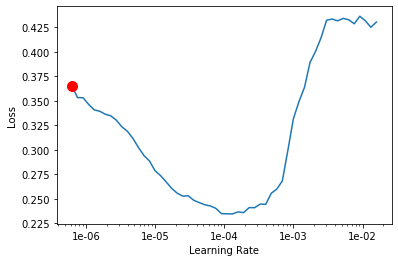

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(12,max_lr=slice(1e-6))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.073762,10.788971,3.142625,00:17
1,0.069140,14.481178,3.587164,00:17
2,0.061207,6.884529,2.523736,00:17
3,0.054363,10.203165,3.072113,00:17
4,0.050036,8.589266,2.817514,00:17
5,0.046744,5.499254,2.257073,00:17
6,0.043161,10.044110,3.039998,00:17
7,0.042363,18.109274,4.069886,00:17
8,0.041528,5.179788,2.196141,00:17
9,0.040846,13.346292,3.506338,00:17


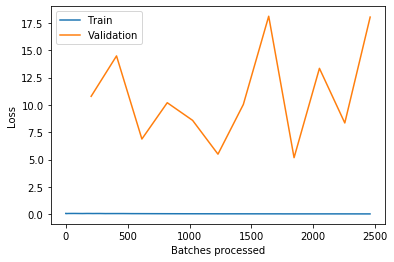

In [0]:
learn.recorder.plot_losses()

In [0]:
predictions, *_ = learn.get_preds(DatasetType.Test)

In [0]:
url_sub='https://raw.githubusercontent.com/anindabitm/Malawi_flood_prediction/master/SampleSubmission_1.csv'
submission=pd.read_csv(url_sub)
print(submission.head())

                              Square_ID  target_2019
0  4e3c3896-14ce-11ea-bce5-f49634744a41        0.109
1  4e3c3897-14ce-11ea-bce5-f49634744a41        0.504
2  4e3c3898-14ce-11ea-bce5-f49634744a41        0.021
3  4e3c3899-14ce-11ea-bce5-f49634744a41        0.827
4  4e3c389a-14ce-11ea-bce5-f49634744a41        0.786


In [0]:
submission.loc[:,'target_2019']=predictions
print(submission.shape)
submission.to_csv('results.csv',index=False)

(16466, 2)


In [0]:
print(submission.head())

                              Square_ID  target_2019
0  4e3c3896-14ce-11ea-bce5-f49634744a41     5.426410
1  4e3c3897-14ce-11ea-bce5-f49634744a41     5.328841
2  4e3c3898-14ce-11ea-bce5-f49634744a41     5.200702
3  4e3c3899-14ce-11ea-bce5-f49634744a41     4.987974
4  4e3c389a-14ce-11ea-bce5-f49634744a41     4.972024


In [0]:
from google.colab import files
files.download('results.csv')